## Machine Learning Tutorial Python - 8: Logistic Regression (Binary Classification)

    linear = continuous
    log = categorical (classification problem, ex: who will person vote for?)
    binary vs multi-class classification (2 vs more choices)


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


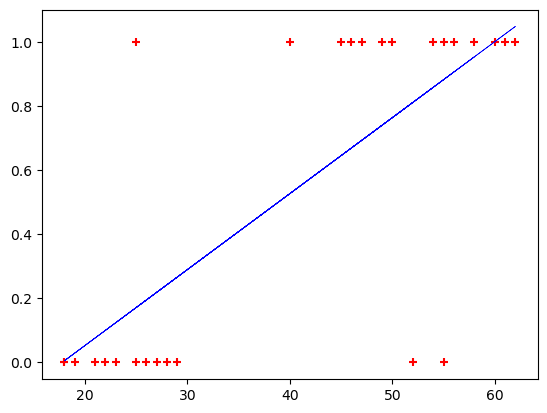

In [32]:
plt.scatter(df.age, df["bought_insurance"], marker="+", color="r")

lin_reg = LinearRegression()
lin_reg.fit(df[["age"]], df[["bought_insurance"]])

plt.plot(df["age"], lin_reg.predict(df[["age"]]), color="b", linewidth=0.5)

linear reg doesnt quite make sense

weighted top right and bottom left

lin reg basically splits the data in half, left and right. One old insurance person can scew the insured person age average and cut off the youngest insurace people

s curve func would be nice (sigmoid/logit func)

    creates range from 0 - 1, feeds lin reg into sigmoid


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["age"]], df[["bought_insurance"]], train_size=0.9
)

In [34]:
X_test

,age
16,25
8,62
19,18


In [35]:
# X_train

In [36]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)
log_model.predict(X_test)

/home/jgmartin/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0])

In [37]:
log_model.score(X_test, y_test)  # 1.0 (small data set)
# log_model.score(X_train, y_train) # 1.0 (small data set)

0.6666666666666666

In [38]:
log_model.predict_proba(X_test)  # % chance will/wont buy insurance

array([[0.94193873, 0.05806127],
       [0.0296091 , 0.9703909 ],
       [0.9815452 , 0.0184548 ]])

In [39]:
log_model.predict([[50]])  # 1: yes

/home/jgmartin/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [40]:
x_plot = np.linspace(df.age.min(), df.age.max(), 300).reshape(-1, 1)
y_pred = log_model.predict_proba(x_plot)[:, 1]

/home/jgmartin/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


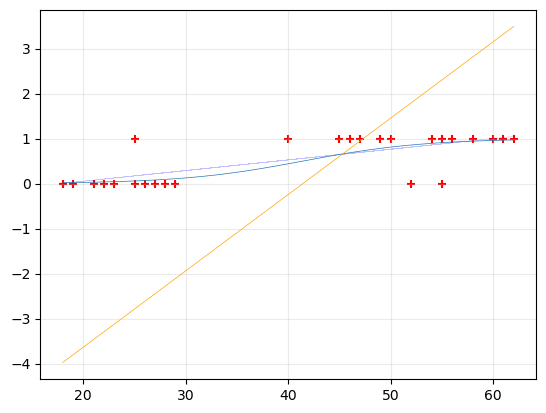

In [43]:
plt.scatter(df.age, df["bought_insurance"], marker="+", color="r")
plt.plot(
    df["age"],
    lin_reg.predict(df[["age"]]),
    color="b",
    linewidth=0.25,
    alpha=0.25,
    linestyle="--",
)

plt.plot(x_plot, y_pred, linewidth=0.5)


z_vals = log_model.coef_[0][0] * x_plot + log_model.intercept_[0] # This is w·x + b (the linear equation inside the sigmoid func, )
plt.plot(x_plot, z_vals, linewidth=0.5, color = "orange")
plt.grid(alpha=0.25)